In [105]:
import numpy as np
import pandas as pd

In [106]:
df = pd.read_csv("spam.csv", encoding='iso-8859-1')

In [107]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4417,ham,"When you get free, call me",NaN,NaN,NaN
5024,ham,I was gonna ask you lol but i think its at 7,NaN,NaN,NaN
3661,ham,"What are you doing in langport? Sorry, but I'l...",NaN,NaN,NaN
1818,ham,Am i that much dirty fellow?,NaN,NaN,NaN
2579,ham,I dunno until when... Lets go learn pilates...,NaN,NaN,NaN


In [108]:
df.shape

(5572, 5)

### 1-Data Cleaning

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [110]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [111]:
df.sample(5)

,v1,v2
926,ham,But I'm on a diet. And I ate 1 too many slices...
3039,ham,One day a crab was running on the sea shore..T...
3406,ham,Beautiful Truth against Gravity.. Read careful...
4120,ham,Yunny... I'm goin to be late
655,ham,Tell them the drug dealer's getting impatient


In [112]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4808,ham,"Don't worry though, I understand how important..."
1478,ham,I think its far more than that but find out. C...
1619,ham,Friends that u can stay on fb chat with
2934,ham,"Yeah, we got one lined up for us"
1244,ham,Now? I'm going out 4 dinner soon..


In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [114]:
df['target'] = encoder.fit_transform(df['target'])

In [115]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [117]:
# check for duplicate values
df.duplicated().sum()

403

In [118]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [119]:
df.duplicated().sum()

0

In [120]:
df.shape

(5169, 2)

### 2-EDA

In [121]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

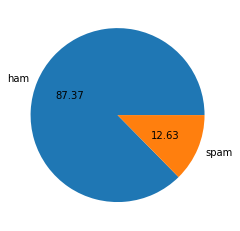

In [123]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [124]:
import nltk

In [125]:
!pip install nltk

In [126]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
df['num_characters'] = df['text'].apply(len)

In [128]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [129]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [130]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [131]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [132]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [133]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [134]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [135]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [136]:
import seaborn as sns

In [137]:
!pip install --upgrade seaborn

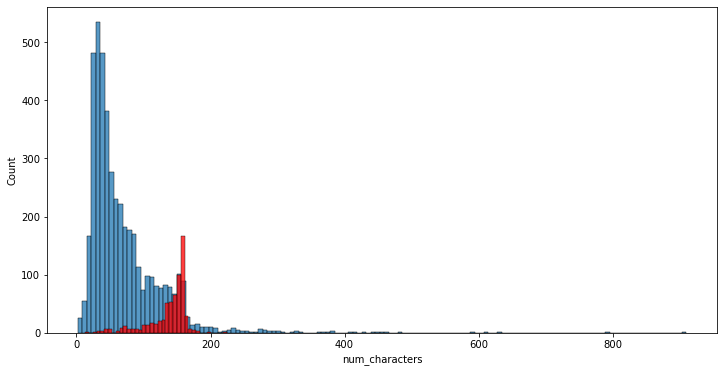

In [138]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], kde=False)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', kde=False)
plt.show()

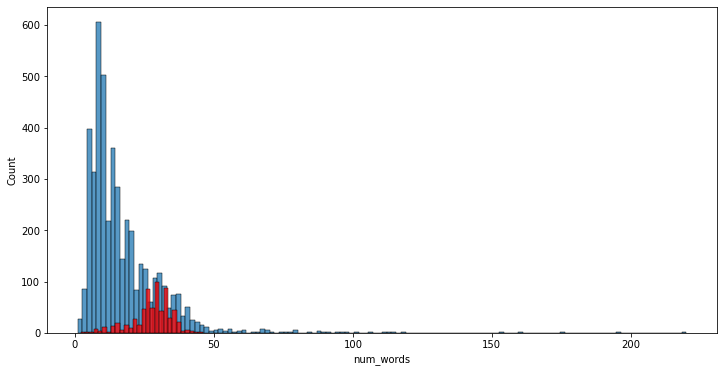

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], kde=False)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', kde=False)
plt.show()

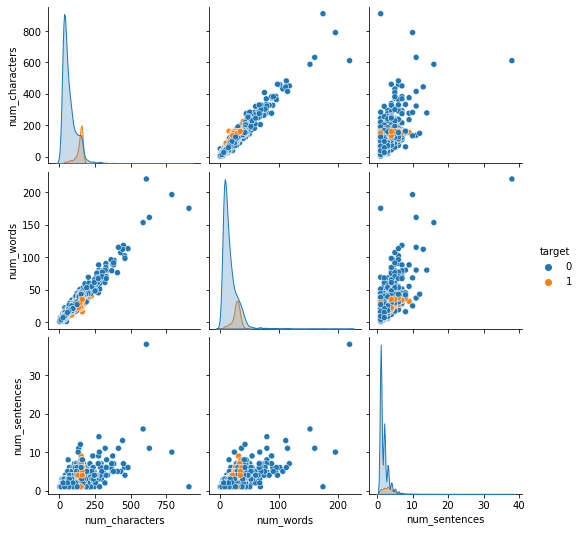

In [140]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

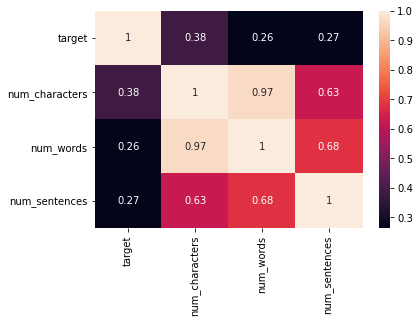

In [141]:
sns.heatmap(df.corr(),annot=True)

### 3-Data Preprocessing
    
    -Lower case
    -Tokenization
    -Removing special characters
    -Removing stop words and punctuation
    -Stemming

In [142]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [144]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [145]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [146]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [147]:
df['transformed_text'] = df['text'].apply(transform_text)

In [148]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
!pip install wordcloud

In [150]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [151]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

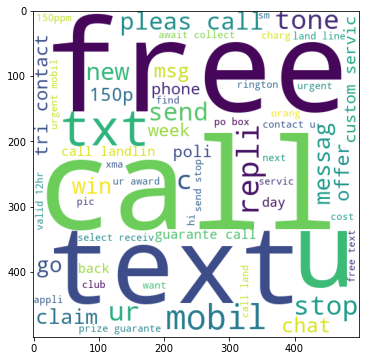

In [152]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [153]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

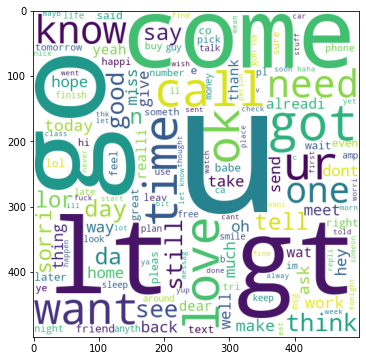

In [154]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [155]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [156]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [157]:
len(spam_corpus)

9939

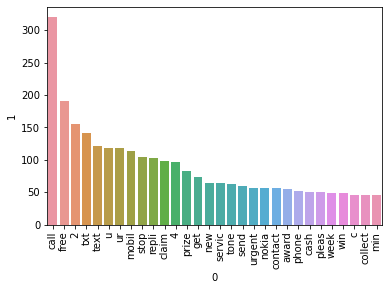

In [158]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

count_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=count_df[0], y=count_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [159]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [160]:
len(ham_corpus)

35402

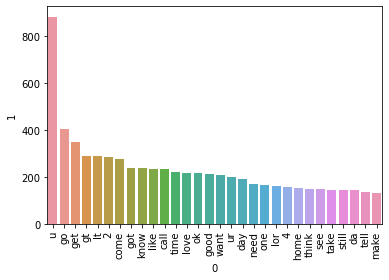

In [161]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

count_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=count_df[0], y=count_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [162]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4-Model Building

In [163]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [164]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [165]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [166]:
X.shape

(5169, 3001)

In [167]:
y = df['target'].values

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [171]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [172]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [173]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [174]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [175]:
# tfidf --> MNB

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [178]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [180]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [181]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9284332688588007
Precision -  0.7807017543859649
For  NB
Accuracy -  0.9410058027079303
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8846153846153846
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [184]:
algos = ['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBC', 'XGB']
performance_df = pd.DataFrame({'Algorithm': algos, 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [185]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.969052,0.981818
8,ETC,0.976789,0.967213
4,LR,0.961315,0.962264
10,XGB,0.971954,0.943089
6,AdaBoost,0.964217,0.931624
9,GBC,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.943907,0.884615
1,KN,0.928433,0.780702


In [186]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [187]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.961315
4,XGB,Accuracy,0.971954
5,AdaBoost,Accuracy,0.964217
6,GBC,Accuracy,0.951644
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.943907
9,KN,Accuracy,0.928433


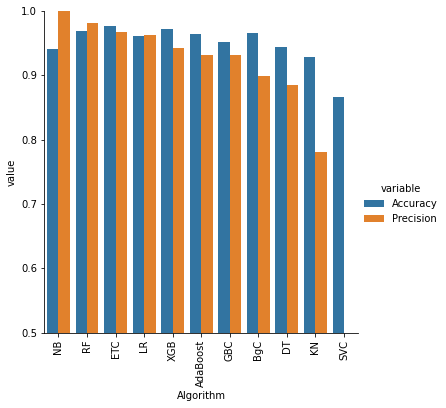

In [188]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [189]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [190]:
import pandas as pd

In [191]:
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')

In [192]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [193]:
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys()), 'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending=False)
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
1,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
2,ETC,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213
3,LR,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264
4,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
5,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
6,DT,0.943907,0.884615,0.943907,0.884615,0.943907,0.884615,0.943907,0.884615
7,KN,0.928433,0.780702,0.928433,0.780702,0.928433,0.780702,0.928433,0.780702
8,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000


In [194]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [195]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [196]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [197]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [198]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [199]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [200]:
from sklearn.ensemble import StackingClassifier

In [201]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [202]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9754098360655737


In [203]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))